In [ ]:
!pip install xgboost

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split 


In [2]:
df = pd.read_csv('C:/Users/91630/Downloads/salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [7]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

### No missing values in our data

In [8]:
# Check for duplicates
duplicates = df.duplicated()

count = duplicates.sum()
print(count)

24


In [9]:
### As there are 24 duplicates in our data we need to remove them first
df.drop_duplicates(keep='first',inplace=True)

In [10]:
# Check for duplicates
duplicates = df.duplicated()

### count the number of duplicates
count = duplicates.sum()
print(count)

0


In [11]:
df.shape

(32537, 15)

In [12]:
#Checking the number of unique values(categories) from all of the object(categorical) datatype
df.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
dtype: int64

In [13]:
### checking the names of all categories
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [14]:
# Separate numerical and categorical columns

numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']

## we'll check the distributions of categorical columns

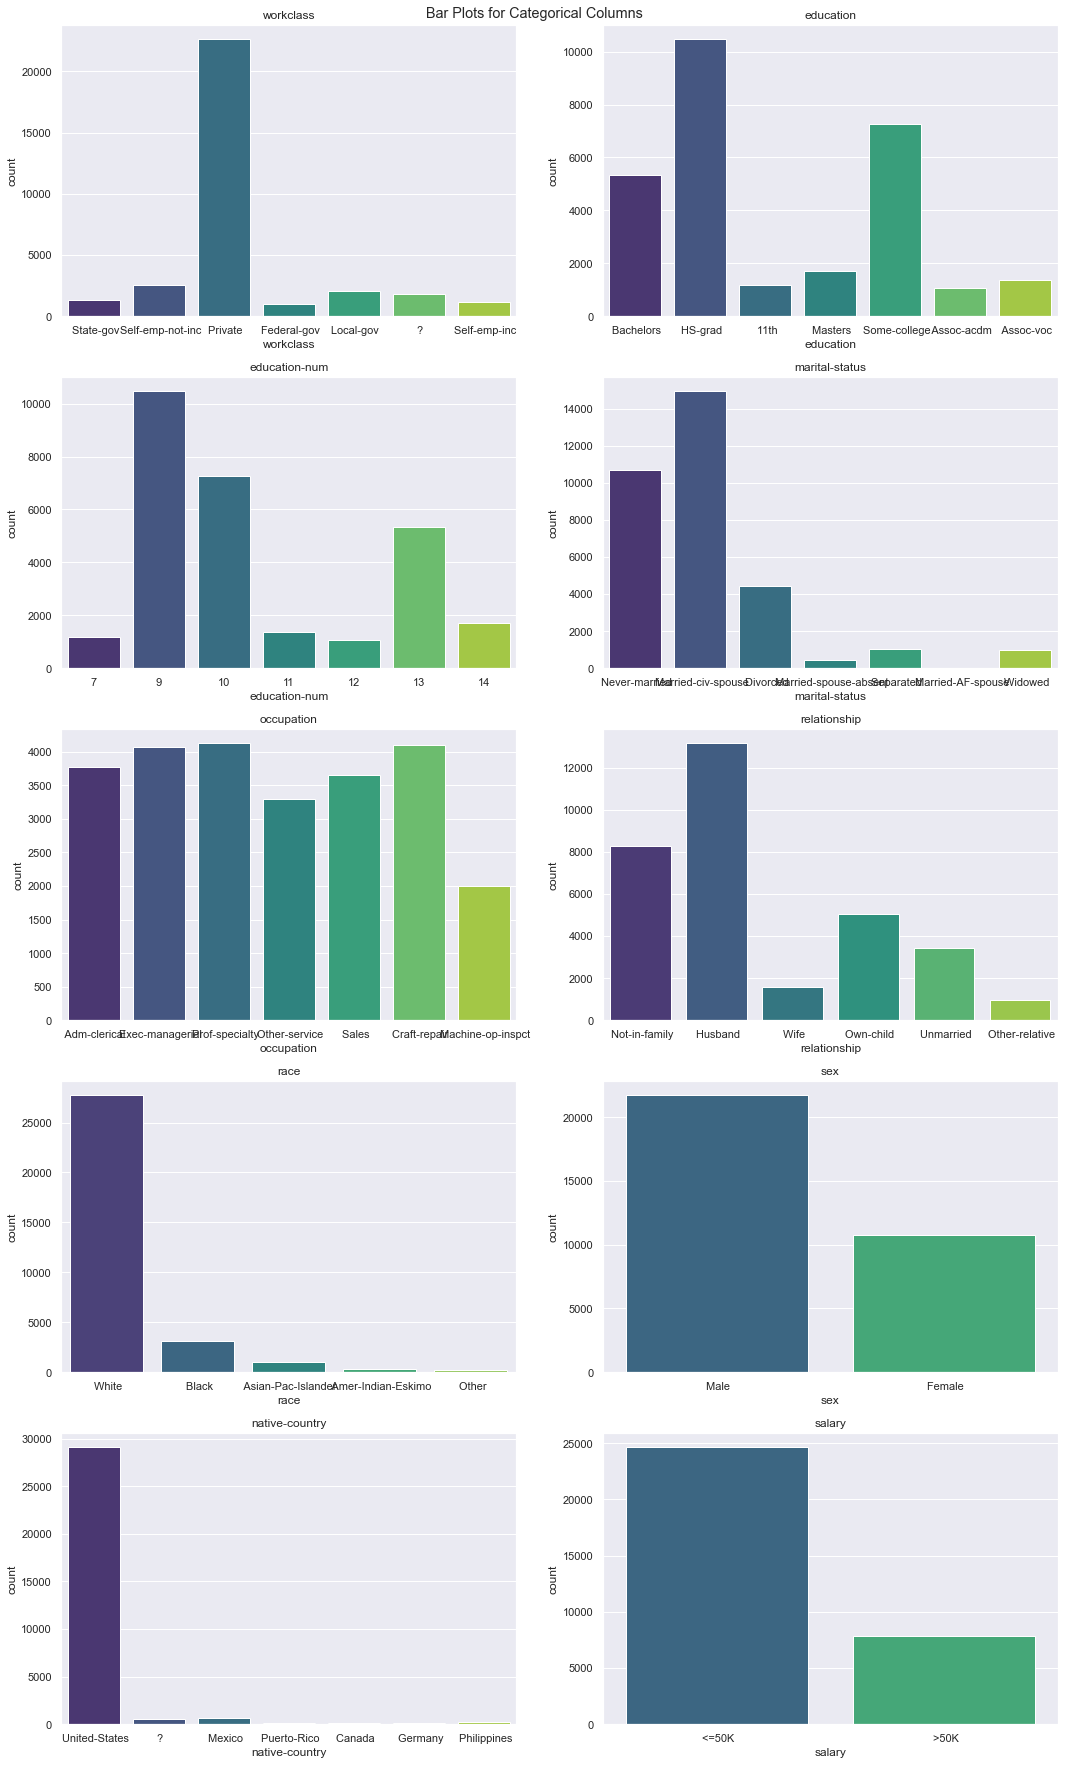

In [15]:
# Set the Seaborn theme (optional)
sns.set_theme()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))  # Adjust the figure size as needed
fig.suptitle('Bar Plots for Categorical Columns')

# Flatten the axes for easy iteration
axes = axes.flatten()

# # Plot bar plots for top 6 values of each categorical column
for i, column in enumerate(categorical_columns):
    top_values = df[column].value_counts().nlargest(7).index
    sns.countplot(x=column, data=df[df[column].isin(top_values)], palette='viridis', ax=axes[i])
    axes[i].set_title(f'{column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()




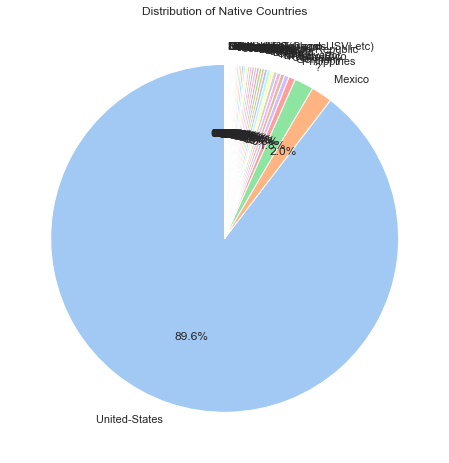

In [16]:
# Get the counts for each unique value in 'native-country'
native_country_counts = df['native-country'].value_counts()

# Set Seaborn color palette to 'pastel' for lighter colors
colors = sns.color_palette('pastel', n_colors=len(native_country_counts))

# Plot a pie plot
plt.figure(figsize=(8, 8))
plt.pie(native_country_counts, labels=native_country_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Native Countries')
plt.show()

In [ ]:
# Get the counts for each unique value in 'native-country'
education_counts = df['education'].value_counts()

# Set Seaborn color palette to 'pastel' for lighter colors
colors = sns.color_palette('pastel', n_colors=len(education_counts))


# Plot a pie plot
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Education')
plt.show()

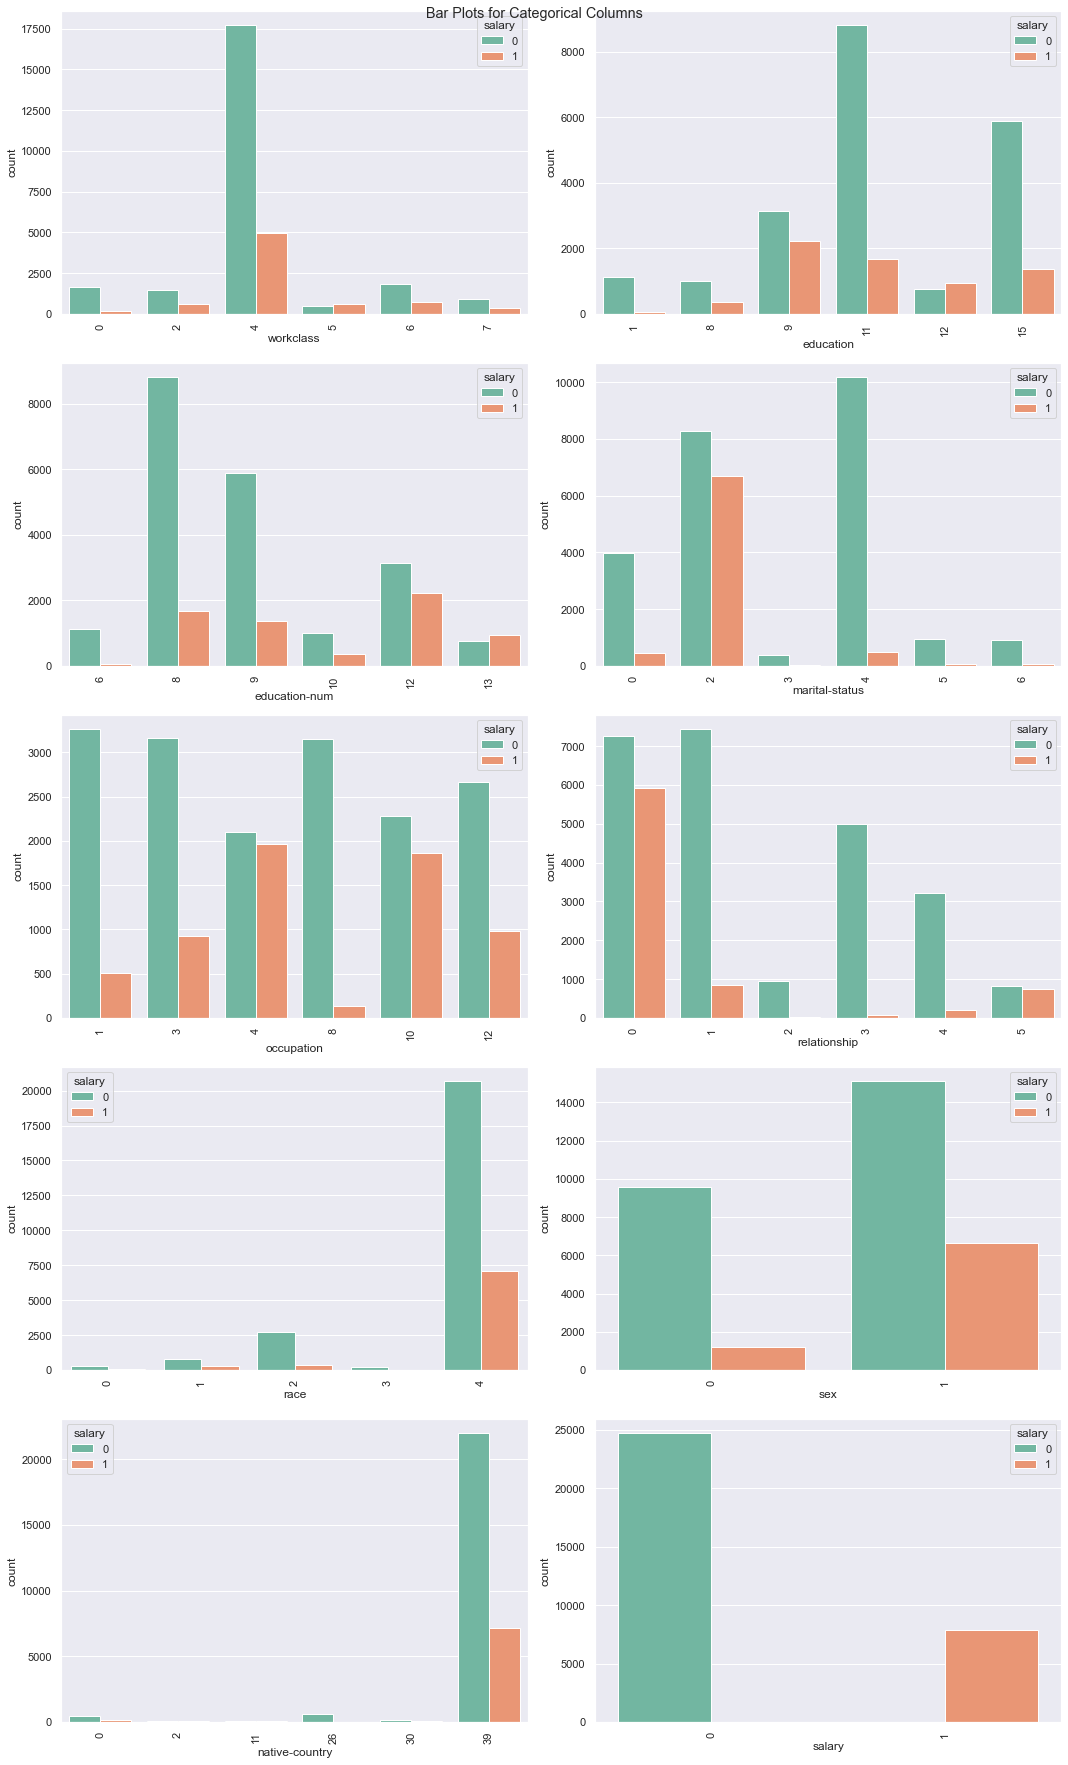

In [18]:
# Set the Seaborn theme (optional)
sns.set_theme()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))  # Adjust the figure size as needed
fig.suptitle('Bar Plots for Categorical Columns')

# Flatten the axes for easy iteration
axes = axes.flatten()

#  Plot bar plots for top 6 values of each categorical column
for i, var in enumerate(categorical_columns):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='salary', data=filtered_df, palette='Set2', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout and show plots
plt.tight_layout()
plt.show()



In [17]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to categorical columns
LE = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: LE.fit_transform(col))


df1 = pd.concat([df[numerical_columns], df[categorical_columns]], axis=1)
df1.head()


,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,2174,0,40,7,9,12,4,1,1,4,1,39,0
1,50,83311,0,0,13,6,9,12,2,4,0,4,1,39,0
2,38,215646,0,0,40,4,11,8,0,6,1,4,1,39,0
3,53,234721,0,0,40,4,1,6,2,6,0,2,1,39,0
4,28,338409,0,0,40,4,9,12,2,10,5,2,0,5,0


## Now we'll check the distributions of numerical variables

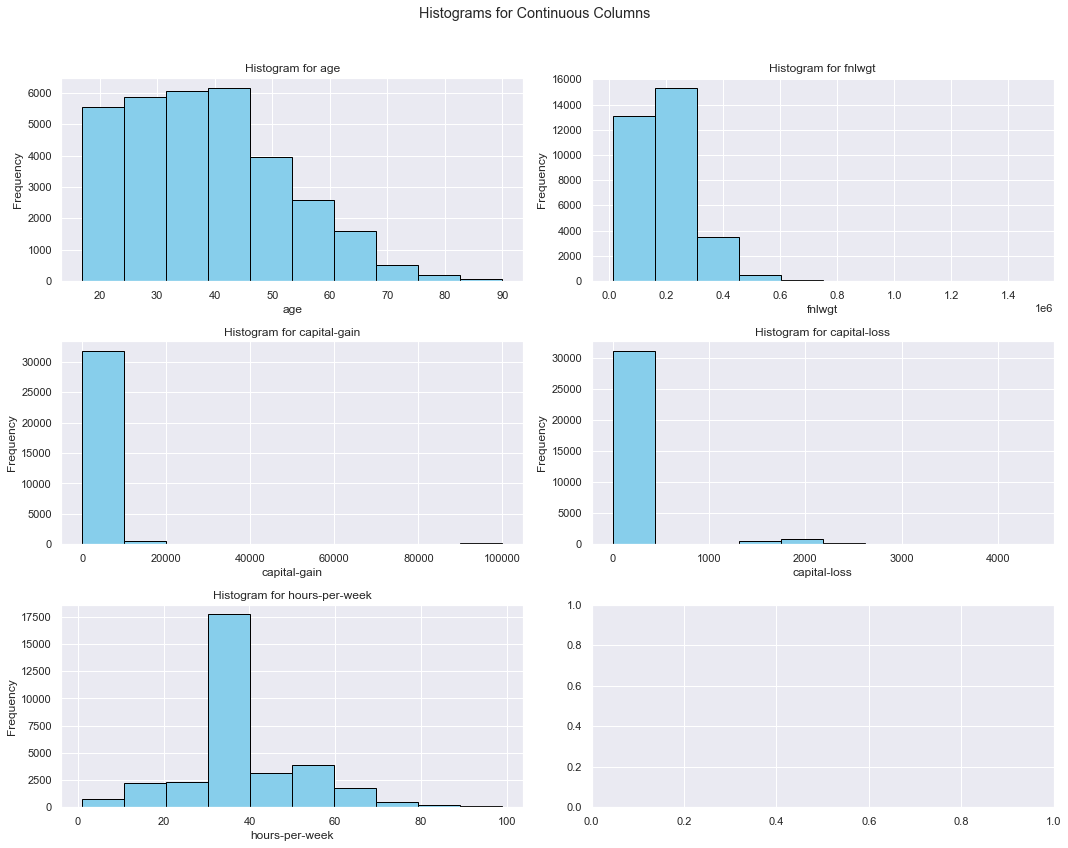

In [19]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Adjust the figure size as needed
fig.suptitle('Histograms for Continuous Columns')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for continuous columns
for i, column in enumerate(numerical_columns):
    df[column].hist(ax=axes[i], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to leave space for the suptitle
plt.show()

In [20]:
### As the distributions are seemed to be skewed we check the skewness
df1.skew(axis=0).sort_values(ascending=False)

capital-gain      11.949403
capital-loss       4.592702
fnlwgt             1.447703
salary             1.211687
relationship       0.786548
age                0.557663
hours-per-week     0.228759
occupation         0.114586
marital-status    -0.012753
education-num     -0.309500
sex               -0.719449
workclass         -0.751598
education         -0.934160
race              -2.435338
native-country    -3.661128
dtype: float64

In [21]:
# Use MinMaxScaler to scale the numerical columns to normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

df1.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.301370,0.044302,0.02174,0.0,0.397959,7,9,12,4,1,1,4,1,39,0
1,0.452055,0.048238,0.00000,0.0,0.122449,6,9,12,2,4,0,4,1,39,0
2,0.287671,0.138113,0.00000,0.0,0.397959,4,11,8,0,6,1,4,1,39,0
3,0.493151,0.151068,0.00000,0.0,0.397959,4,1,6,2,6,0,2,1,39,0
4,0.150685,0.221488,0.00000,0.0,0.397959,4,9,12,2,10,5,2,0,5,0


In [ ]:
# Set the Seaborn theme (optional)
sns.set_theme()

num_df = df1[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Adjust the figure size as needed
fig.suptitle('Box Plots for Continuous Columns')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for  each numrical column
for i, column in enumerate(num_df):
    sns.boxplot(x=column, data=df1, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [22]:
def IQR(df,x):
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    df_skew_new = pd.DataFrame(np.where(df[x] > max_limit, max_limit, (np.where(df[x] < min_limit, min_limit, df[x]))), columns=[x])
    df=df_skew_new[x]
    return df
df1['age']=IQR(df,'age')
df1['fnlwgt']=IQR(df,'fnlwgt')
df1['hours-per-week']=IQR(df,'hours-per-week')

<AxesSubplot:>

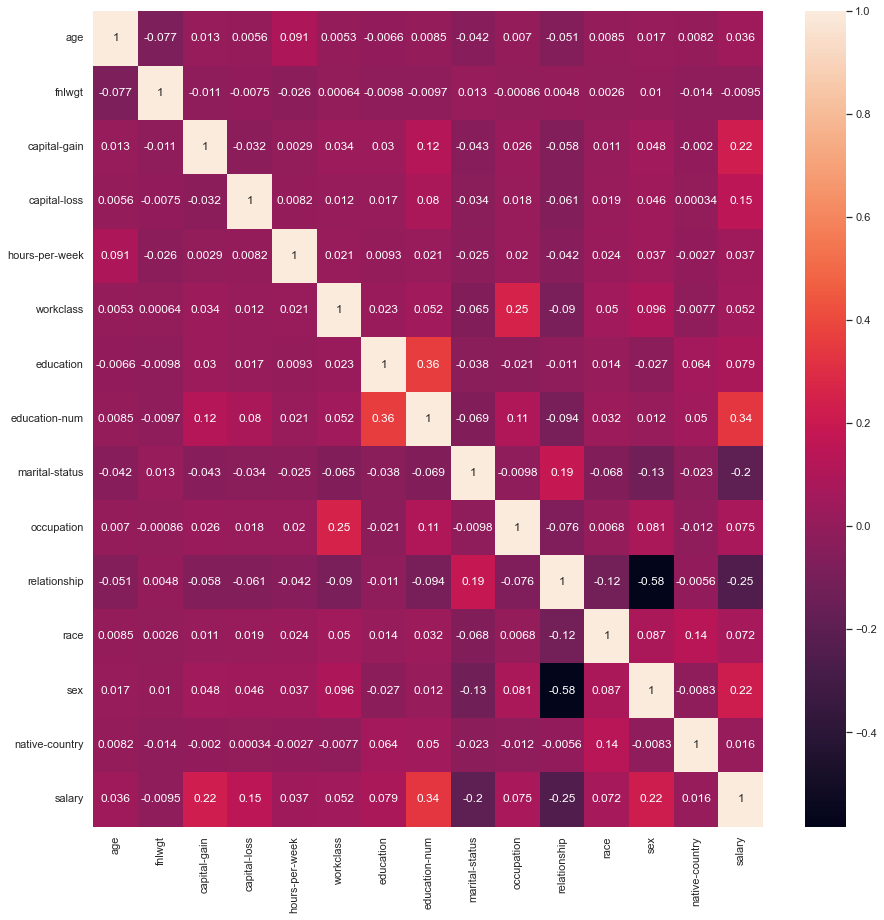

In [23]:
# Correlation Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(), annot=True)

In [24]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

correlation_matrix['salary'].sort_values(ascending=False)

salary            1.000000
education-num     0.335272
capital-gain      0.223336
sex               0.215969
capital-loss      0.150501
education         0.079366
occupation        0.075419
race              0.071847
workclass         0.051665
hours-per-week    0.036629
age               0.036043
native-country    0.015618
fnlwgt           -0.009469
marital-status   -0.199199
relationship     -0.250948
Name: salary, dtype: float64

In [25]:
x = df1[['education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss']]
y = df1["salary"]


In [26]:
## Scaling the data
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [27]:
### As the response variable is highly imbalanced we'll use stratified sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0, stratify=y)

In [28]:
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
import itertools


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [29]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# SVM
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# AdaBoost
adaboost_model = AdaBoostClassifier(random_state=0)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluation Metrics
models = [logistic_model, random_forest_model, svm_model, knn_model, xgb_model, adaboost_model, decision_tree_model]
model_names = ["Logistic Regression", "Random Forest", "SVM", "KNN", "XGBoost", "AdaBoost", "Decision Tree"]

for model, name in zip(models, model_names):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)

    print(f"\nEvaluation Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_mat}")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.8122
Precision: 0.7163
Recall: 0.3654
F1 Score: 0.4840
Confusion Matrix:
[[4713  227]
 [ 995  573]]

Evaluation Metrics for Random Forest:
Accuracy: 0.8559
Precision: 0.7634
Recall: 0.5823
F1 Score: 0.6606
Confusion Matrix:
[[4657  283]
 [ 655  913]]

Evaluation Metrics for SVM:
Accuracy: 0.8380
Precision: 0.7043
Recall: 0.5651
F1 Score: 0.6270
Confusion Matrix:
[[4568  372]
 [ 682  886]]

Evaluation Metrics for KNN:
Accuracy: 0.8187
Precision: 0.6214
Recall: 0.6333
F1 Score: 0.6273
Confusion Matrix:
[[4335  605]
 [ 575  993]]

Evaluation Metrics for XGBoost:
Accuracy: 0.8620
Precision: 0.7868
Recall: 0.5861
F1 Score: 0.6718
Confusion Matrix:
[[4691  249]
 [ 649  919]]

Evaluation Metrics for AdaBoost:
Accuracy: 0.8506
Precision: 0.7734
Recall: 0.5376
F1 Score: 0.6343
Confusion Matrix:
[[4693  247]
 [ 725  843]]

Evaluation Metrics for Decision Tree:
Accuracy: 0.8560
Precision: 0.7671
Recall: 0.5778
F1 Score: 0.6591
Confusion Mat

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding F1 Score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score: 0.6859979819054208


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data

# Define the parameter grid to search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)

# Instantiate GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
rf_grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding F1 Score
print("\nRandom Forest - Best Parameters:")
print(rf_grid_search.best_params_)
print("Best F1 Score:", rf_grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits

Random Forest - Best Parameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.6719454850273027


In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid to search for AdaBoost
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
}

# Create an AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=0)

# Instantiate GridSearchCV for AdaBoost
adaboost_grid_search = GridSearchCV(estimator=adaboost_model, param_grid=adaboost_param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
adaboost_grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding F1 Score
print("\nAdaBoost - Best Parameters:")
print(adaboost_grid_search.best_params_)
print("Best F1 Score:", adaboost_grid_search.best_score_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits

AdaBoost - Best Parameters:
{'learning_rate': 1.0, 'n_estimators': 200}
Best F1 Score: 0.672121013438138


In [33]:
# Create an XGBoost classifier with the best parameters
best_xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=1.0,
    random_state=0
)

# Fit the model with the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
best_xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the model using the optimized hyperparameters
accuracy = accuracy_score(y_test, best_xgb_predictions)
precision = precision_score(y_test, best_xgb_predictions)
recall = recall_score(y_test, best_xgb_predictions)
f1 = f1_score(y_test, best_xgb_predictions)
confusion_mat = confusion_matrix(y_test, best_xgb_predictions)

# Display the evaluation metrics
print("\nEvaluation Metrics for XGBoost with Optimized Hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion_mat}")




Evaluation Metrics for XGBoost with Optimized Hyperparameters:
Accuracy: 0.8629
Precision: 0.7939
Recall: 0.5823
F1 Score: 0.6718
Confusion Matrix:
[[4703  237]
 [ 655  913]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
# Assuming 'rf_model' is your original Random Forest model

# Create a Random Forest classifier with the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=20,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=50,
    random_state=0
)

# Fit the model with the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the model using the optimized hyperparameters
accuracy = accuracy_score(y_test, best_rf_predictions)
precision = precision_score(y_test, best_rf_predictions)
recall = recall_score(y_test, best_rf_predictions)
f1 = f1_score(y_test, best_rf_predictions)
confusion_mat = confusion_matrix(y_test, best_rf_predictions)

# Display the evaluation metrics
print("\nEvaluation Metrics for Random Forest with Optimized Hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion_mat}")



Evaluation Metrics for Random Forest with Optimized Hyperparameters:
Accuracy: 0.8556
Precision: 0.7849
Recall: 0.5517
F1 Score: 0.6479
Confusion Matrix:
[[4703  237]
 [ 703  865]]


In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
# Assuming 'adaboost_model' is your original AdaBoost model

# Create an AdaBoost classifier with the best parameters
best_adaboost_model = AdaBoostClassifier(
    learning_rate=1.0,
    n_estimators=200,
    random_state=0
)

# Fit the model with the training data
best_adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
best_adaboost_predictions = best_adaboost_model.predict(X_test)

# Evaluate the model using the optimized hyperparameters
accuracy = accuracy_score(y_test, best_adaboost_predictions)
precision = precision_score(y_test, best_adaboost_predictions)
recall = recall_score(y_test, best_adaboost_predictions)
f1 = f1_score(y_test, best_adaboost_predictions)
confusion_mat = confusion_matrix(y_test, best_adaboost_predictions)

# Display the evaluation metrics
print("\nEvaluation Metrics for AdaBoost with Optimized Hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion_mat}")



Evaluation Metrics for AdaBoost with Optimized Hyperparameters:
Accuracy: 0.8602
Precision: 0.7886
Recall: 0.5733
F1 Score: 0.6640
Confusion Matrix:
[[4699  241]
 [ 669  899]]


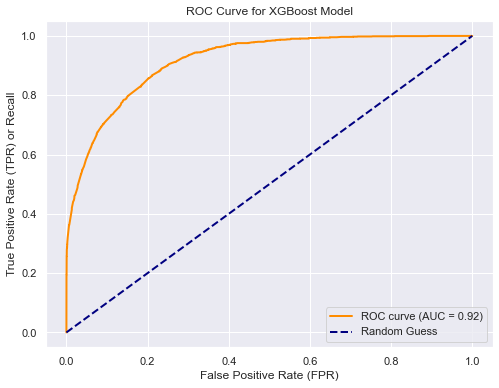

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'best_xgb_model' is your XGBoost model and 'X_test', 'y_test' are your test data
# Make sure to have 'from xgboost import XGBClassifier' at the beginning of your script

# Predict probabilities for the positive class
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()


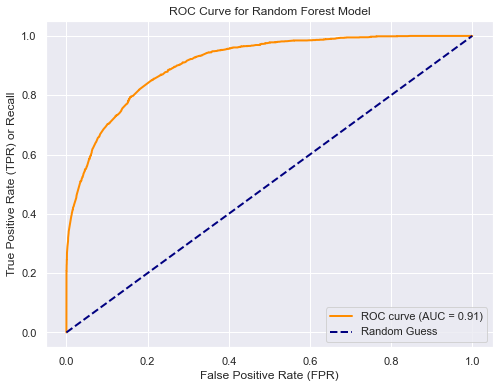

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'best_rf_model' is your Random Forest model with optimized hyperparameters
# Assuming 'X_test' and 'y_test' are your test data

# Predict probabilities for the positive class
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()


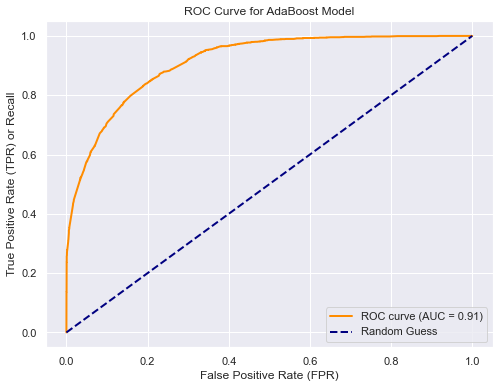

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'best_adaboost_model' is your AdaBoost model with optimized hyperparameters
# Assuming 'X_test' and 'y_test' are your test data

# Predict probabilities for the positive class
y_prob_adaboost = best_adaboost_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_adaboost))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve for AdaBoost Model')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score

# Assuming 'best_adaboost_model' and 'best_xgboost_model' are your models

# Cross-validation for AdaBoost
adaboost_cv_scores = cross_val_score(best_adaboost_model, X_train, y_train, cv=5, scoring='f1')

# Cross-validation for XGBoost
xgboost_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='f1')

# Display mean cross-validation scores
print("Mean F1 Score (AdaBoost):", adaboost_cv_scores.mean())
print("Mean F1 Score (XGBoost):", xgboost_cv_scores.mean())


Mean F1 Score (AdaBoost): 0.6760667724629821
Mean F1 Score (XGBoost): 0.6832970633689228


In [40]:
from sklearn.metrics import classification_report

# Assuming 'best_adaboost_model_predictions' and 'best_xgboost_model_predictions' are your test set predictions

# Classification report for AdaBoost
print("Classification Report (AdaBoost):")
print(classification_report(y_test, best_adaboost_predictions))

# Classification report for XGBoost
print("Classification Report (XGBoost):")
print(classification_report(y_test, best_xgb_predictions))


Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4940
           1       0.79      0.57      0.66      1568

    accuracy                           0.86      6508
   macro avg       0.83      0.76      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4940
           1       0.79      0.58      0.67      1568

    accuracy                           0.86      6508
   macro avg       0.84      0.77      0.79      6508
weighted avg       0.86      0.86      0.86      6508

